<h1>VENUES AND LIVING IN SAN JOSE, CA</h1>

<h2>Capstone Project - The Battle of Neighborhoods</h2>

</br></br> <h2>Table of content</h2>

<div class="alert alert-block alert-info" style="margin-top: 5px">
1. <a href="#item1">Introduction</a> </br>
2. <a href="#item2">Data</a></br>
3. <a href="#item3">Methodology</a></br>
4. <a href="#item4">Results</a></br>
5. <a href="#item5">Discussion</a>  </br>  
6. <a href="#item6">Conclusion</a>  </br>
7. <a href="#item7">References</a>  </br>
</div>


<h2><a name="item1"></a>Introduction</h2>

Every year, more that 7 million Americans move to a different state within the US [1]. Along with it, comes the responsibility of finding a good location to lay roots and settle. One of the major indicators that people relay on when deciding where to move is the availability of venues that fit their needs and lifestyle. Having moved to San Jose lately myself, I discuss in this report the different venues in San Jose neighborhoods, their types, distribution and clusters that they fall into. By the end of the report, the knowledge produced shall be sufficient in guiding the moving decision based on venues nearby, and choosing the best fit neighborhood depending on one’s needs. 

<h2><a name="item2"></a>Data</h2>

In this project, we focus on the city of San Jose and its neighborhood. Wikipedia provides a comprehensive list of San Jose’s neighborhoods that we will be utilizing for this project [2]. As you can notice, the list is organized alphabetically, but other than that not much information is provided in this page other than the neighborhood names. Luckily, each neighborhood name links to a page dedicated to that neighborhoods information from where we shall acquire the latitude and longitude information of the center of that neighborhood. 

</br>There are multiple challenges with these data: First, some of the neighborhoods don’t provide latitude and longitude information; thus, we eliminate such neighborhoods from our experiment. Next, the distances between the neighborhoods’ centers are not normalized which causes duplicate venue entries when retrieving nearby venues. We keep this information into perspective when reading the final results. 

</br>Other data used in this project, is the venues data retrieved using the Foursquare API. Specifically, nearby venues to each neighborhood are recorded and utilized in understanding and qualifying the neighborhoods. 

</br>The following few sells are the steps of retriving neighborhood data.

First, import all the necessary libraries for scrapping the San Jose neighborhood information.

In [2]:
#!pip install BeautifulSoup4 
from bs4 import BeautifulSoup
#!conda install -c anaconda lxml --yes
import requests # library to handle requests
import pandas as pd

Next, collect the text from the Wikipedia webpage with the neighborhood data and isolate the div tag where the needed information is stored.

In [3]:
source = requests.get("https://en.wikipedia.org/wiki/Category:Neighborhoods_in_San_Jose,_California").text
soup = BeautifulSoup(source, 'lxml')
soup.find('div', class_="mw-category")

<div class="mw-category"><div class="mw-category-group"><h3>A</h3>
<ul><li><a href="/wiki/The_Alameda,_San_Jose" title="The Alameda, San Jose">The Alameda, San Jose</a></li>
<li><a href="/wiki/Almaden_Valley,_San_Jose" title="Almaden Valley, San Jose">Almaden Valley, San Jose</a></li>
<li><a href="/wiki/Alum_Rock,_San_Jose" title="Alum Rock, San Jose">Alum Rock, San Jose</a></li>
<li><a href="/wiki/Alviso,_San_Jose" title="Alviso, San Jose">Alviso, San Jose</a></li></ul></div><div class="mw-category-group"><h3>B</h3>
<ul><li><a href="/wiki/Berryessa,_San_Jose" title="Berryessa, San Jose">Berryessa, San Jose</a></li>
<li><a href="/wiki/Blossom_Valley,_San_Jose" title="Blossom Valley, San Jose">Blossom Valley, San Jose</a></li>
<li><a href="/wiki/Buena_Vista,_San_Jose" title="Buena Vista, San Jose">Buena Vista, San Jose</a></li>
<li><a href="/wiki/Burbank,_Santa_Clara_County,_California" title="Burbank, Santa Clara County, California">Burbank, Santa Clara County, California</a></li></ul>

</br></br>Here, we created a function that would retrieve the latitude and longitude information from a given url.

In [4]:
def retrieve_latlng(url):
    source = requests.get(url).text
    page = BeautifulSoup(source, 'lxml')
    try:
        return page.find('span', class_="geo").text.split(";")
    except:
        return list()

In this step we extract all the neighborhood names and their Wikipedia urls. We pass the urls to the previously mentioned function aiming at collecting the lat lng information of each neighborhood.

In [5]:
latlng_list = list()
neigh_list = list()
for div in soup.find('div', class_="mw-category"): 
    for link in div.find_all('a', href=True):
        latlng_list.append(retrieve_latlng("https://en.wikipedia.org"+link['href']))
    for litag in div.find_all('li'):
        neigh_list.append(litag.text)

We notice that some neighborhood names include an unnecessary reference to San Jose so we eliminate that here. The printed information represents the list of neighborhoods collected alongside their location information and finally the length of the list is printed.

In [6]:
SJ_neigh = list()
for i in range(len(latlng_list)):
    if latlng_list[i]: #check to make sure that the list is not empty
        latlng_list[i].insert(0, neigh_list[i].split(',', 1)[0]) #append the neighborhood name
        SJ_neigh.append(latlng_list[i])
print(SJ_neigh)
print("There are "+ str(len(SJ_neigh)) +" neighborhoods in San Jose, CA")

[['The Alameda', '37.332230100', ' -121.906287000'], ['Almaden Valley', '37.2214', ' -121.8622'], ['Alum Rock', '37.36750', ' -121.82556'], ['Alviso', '37.42500', ' -121.96667'], ['Berryessa', '37.386329', ' -121.86051'], ['Blossom Valley', '37.23914', ' -121.93748'], ['Buena Vista', '37.32139', ' -121.91667'], ['Burbank', '37.32056', ' -121.93167'], ['Cambrian Park', '37.25556', ' -121.92889'], ['Chinatowns in San Jose', '37.333', ' -121.900'], ['Communications Hill', '37.287500', ' -121.865908'], ['Coyote Valley', '37.18', ' -121.70'], ['Downtown Historic District (San Jose', '37.3345250', ' -121.8872389'], ['Downtown San Jose', '37.332', ' -121.89'], ['East Foothills', '37.38389', ' -121.82250'], ['East San Jose', '37.329423', ' -121.815689'], ['Edenvale', '37.24118', ' -121.79932'], ['Evergreen', '37.3096638', ' -121.7835622'], ['Japantown', '37.348463', ' -121.895421'], ['King and Story', '37.340', ' -121.843'], ['Little Portugal', '37.35012', ' -121.85768'], ['Meadowfair', '37.31

</br></br>We move the collected data to a pandas dataframe.

In [7]:
SJ_neigh = pd.DataFrame(SJ_neigh, columns=["neigh_name", "lat", "lng"])
print(SJ_neigh.shape)
SJ_neigh.head()

(42, 3)


,neigh_name,lat,lng
0,The Alameda,37.332230100,-121.906287000
1,Almaden Valley,37.2214,-121.8622
2,Alum Rock,37.36750,-121.82556
3,Alviso,37.42500,-121.96667
4,Berryessa,37.386329,-121.86051


Lets draw a map of San Jose, CA and its neighborhoods.

In [8]:
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [9]:
#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

In [10]:
address = 'San Jose, CA'

geolocator = Nominatim(user_agent="SJ_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of San Jose are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of San Jose are 37.3361905, -121.8905833.


In [11]:
# create map of San Jose using latitude and longitude values
map_SJ = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, neighborhood in zip(SJ_neigh['lat'], SJ_neigh['lng'], SJ_neigh['neigh_name']):
    label = neighborhood
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
       [float(lat), float(lng)],
       radius=8,
       popup=label,
       color='blue',
       fill=True,
       fill_color='#3186cc',
       fill_opacity=0.7,
       parse_html=False).add_to(map_SJ)  


map_SJ



<h2><a name="item3"></a>Methodology</h2>

Now that we have the list of neighborhood in San Jose, we can start collecting information about each hood based on its latitude and longitude information. We utilize Foursquare API to collect more information regarding nearby venues.

We start by connecting to the API using your own client id and client secret (please don't use mine!).

In [12]:
CLIENT_ID = 'ZLNCVVDMUTSIAICKT103POACTFZMR4COUZMCMB4UUN5MYA3X' # your Foursquare ID
CLIENT_SECRET = 'SCRJ41NA15ZHMBPSEMB115J3SBV33QTBTMUQ25CZJOBWEBKH' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

Lets retrieve the information of the first neighborhood in the list. Are we able to request a list of nearby venues to this hood?

In [13]:

neighborhood_latitude = SJ_neigh.loc[0, 'lat'] # neighborhood latitude value
neighborhood_longitude = SJ_neigh.loc[0, 'lng'] # neighborhood longitude value

neighborhood_name = SJ_neigh.loc[0, 'neigh_name'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of The Alameda are 37.332230100,  -121.906287000.


Here we create the prper link to call the API and collect infor about The Alameda neighborhood.

In [14]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius


 # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=ZLNCVVDMUTSIAICKT103POACTFZMR4COUZMCMB4UUN5MYA3X&client_secret=SCRJ41NA15ZHMBPSEMB115J3SBV33QTBTMUQ25CZJOBWEBKH&v=20180605&ll=37.332230100, -121.906287000&radius=500&limit=100'

In [15]:
import requests
results = requests.get(url).json()


We create the get category type to facilitate the information retrieval process.

In [16]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Let's retrive and print the top of the list of nearby venues to The Alameda neighborhood.

In [17]:
import json
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Whole Foods Market,Grocery Store,37.332086,-121.904623
1,Hannah Cafe,Coffee Shop,37.331597,-121.905520
2,Bluefin Japanese Restaurant & Lounge,Sushi Restaurant,37.331733,-121.905002
3,Crema Coffee Roasting Company,Coffee Shop,37.331365,-121.908248
4,Chipotle Mexican Grill,Mexican Restaurant,37.331907,-121.908660


In [18]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

35 venues were returned by Foursquare.


Now, we generalize our approach and create a funnction that, when passed a nieghborhood name and location, would return a full list of nearby venues.

In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In this step, we create a dataframe that includes the information of all venues within 500 radius points of all neighborhoods in SJ.

In [20]:

SJ_venues = getNearbyVenues(names=SJ_neigh['neigh_name'],
                                   latitudes=SJ_neigh['lat'],
                                   longitudes=SJ_neigh['lng']
                                  )
SJ_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Alameda,37.332230100,-121.906287000,Whole Foods Market,37.332086,-121.904623,Grocery Store
1,The Alameda,37.332230100,-121.906287000,Hannah Cafe,37.331597,-121.905520,Coffee Shop
2,The Alameda,37.332230100,-121.906287000,Bluefin Japanese Restaurant & Lounge,37.331733,-121.905002,Sushi Restaurant
3,The Alameda,37.332230100,-121.906287000,Crema Coffee Roasting Company,37.331365,-121.908248,Coffee Shop
4,The Alameda,37.332230100,-121.906287000,Chipotle Mexican Grill,37.331907,-121.908660,Mexican Restaurant


Le's explore the data more by sorting the values by the venues. Here we start to notice the flaw of specifying the same radius for all neighborhoods when retrieving the venues. Some venues are within the 500 radius of more than one neighborhood which results in it being included in more than one neighborhood's list.
</br> A clear example is 24 Hour Fitness.

In [21]:
sortedSJ_venues = SJ_venues.sort_values(by=['Venue'])
sortedSJ_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1097,Willow Glen,37.30357,-121.897345,20twenty cheese bar,37.303821,-121.897598,Wine Bar
594,Rose Garden,37.3096638,-121.7835622,24 Hour Fitness,37.308884,-121.785842,Gym / Fitness Center
98,Buena Vista,37.32139,-121.91667,24 Hour Fitness,37.317823,-121.915577,Gym / Fitness Center
435,Evergreen,37.3096638,-121.7835622,24 Hour Fitness,37.308884,-121.785842,Gym / Fitness Center
254,Downtown Historic District (San Jose,37.3345250,-121.8872389,4th St. Pizza Co.,37.337604,-121.887421,Pizza Place


There is a total of 1122 venues (including reduduncy). Only 202 unique categories detected.

In [22]:
print(SJ_venues.shape)
print('There are {} uniques categories.'.format(len(SJ_venues['Venue Category'].unique())))

(1122, 7)
There are 202 uniques categories.


We want to figure out which neighborhood has the most number of nearby venues. This information will definitely help making a decision when moving in.

We can see the results in the bar plot. SoFA District is the first on that list, which no surprise as the South of First Area is know to be an entertainment area in downtown San Jose. Moreover, Downtown San Jose comes in the second place which is expected as SoFA and Downtown are pretty much referring to the same area when you go back and look at the map. Also, San Pedro Square is very close that we can consider it to be the same area as the first two.

In [23]:
import matplotlib.pyplot as plt

popular_neigh = SJ_venues.groupby('Neighborhood').size().to_frame(name = 'count').reset_index().sort_values(by=['count'], ascending=False)
popular_neigh.plot.bar(x='Neighborhood', figsize=(18,4), fontsize=20)
popular_neigh.shape

popular_neigh.head()

,Neighborhood,count
35,SoFA District,100
13,Downtown San Jose,100
29,San Pedro Square,100
12,Downtown Historic District (San Jose,91
31,Santana Row,71


There is a big problem with redunducy here so looking back at the map, we remove from the list all the data that represent closely located hoods.

In [24]:
map_SJ

Let's print out the size of the dataframe before and after we take out closely located neighborhoods. After that, we redraw the map for a clear look.

In [31]:
# SJ_neigh.head()
# print(SJ_neigh['neigh_name'])
SJ_neigh2 = SJ_neigh.set_index('neigh_name')
print(SJ_neigh.shape)
SJ_neigh2= SJ_neigh2.drop(['North San Jose Innovation District', 
               'West San Carlos', 'San Jose', 
               'Downtown Historic District (San Jose', 
               'Downtown San Jose'])
print(SJ_neigh2.shape)
SJ_neigh1 = SJ_neigh2.reset_index()
map_SJ = folium.Map(location=[latitude, longitude], zoom_start=13)

for lat, lng, neighborhood in zip(SJ_neigh1['lat'], SJ_neigh1['lng'], SJ_neigh1['neigh_name']):
    label = neighborhood
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
       [float(lat), float(lng)],
       radius=8,
       popup=label,
       color='blue',
       fill=True,
       fill_color='#3186cc',
       fill_opacity=0.7,
       parse_html=False).add_to(map_SJ)  


map_SJ

(42, 3)
(37, 2)


Let's recreate the San Jose venue dataframe and we can see now the number of venues decreasing from 1122 venues to only 864 venues.

In [32]:
SJ_venues = getNearbyVenues(names=SJ_neigh1['neigh_name'],
                                   latitudes=SJ_neigh1['lat'],
                                   longitudes=SJ_neigh1['lng']
                                  )
print(SJ_venues.head())
print(SJ_venues.shape)


  Neighborhood Neighborhood Latitude Neighborhood Longitude  \
0  The Alameda          37.332230100         -121.906287000   
1  The Alameda          37.332230100         -121.906287000   
2  The Alameda          37.332230100         -121.906287000   
3  The Alameda          37.332230100         -121.906287000   
4  The Alameda          37.332230100         -121.906287000   

                                  Venue  Venue Latitude  Venue Longitude  \
0                    Whole Foods Market       37.332086      -121.904623   
1                           Hannah Cafe       37.331597      -121.905520   
2  Bluefin Japanese Restaurant & Lounge       37.331733      -121.905002   
3         Crema Coffee Roasting Company       37.331365      -121.908248   
4                Chipotle Mexican Grill       37.331907      -121.908660   

       Venue Category  
0       Grocery Store  
1         Coffee Shop  
2    Sushi Restaurant  
3         Coffee Shop  
4  Mexican Restaurant  
(864, 7)


We are interested in knowing the venue category that appears the most in San Jose. We group the venues by their category and plot the result. We notice that <b>coffee shops</b> and <b>Mexican restaurants</b> are the most common type of venues.

,Venue Category,count
40,Coffee Shop,40
122,Mexican Restaurant,36
159,Sandwich Place,24
145,Pizza Place,20
88,Grocery Store,16


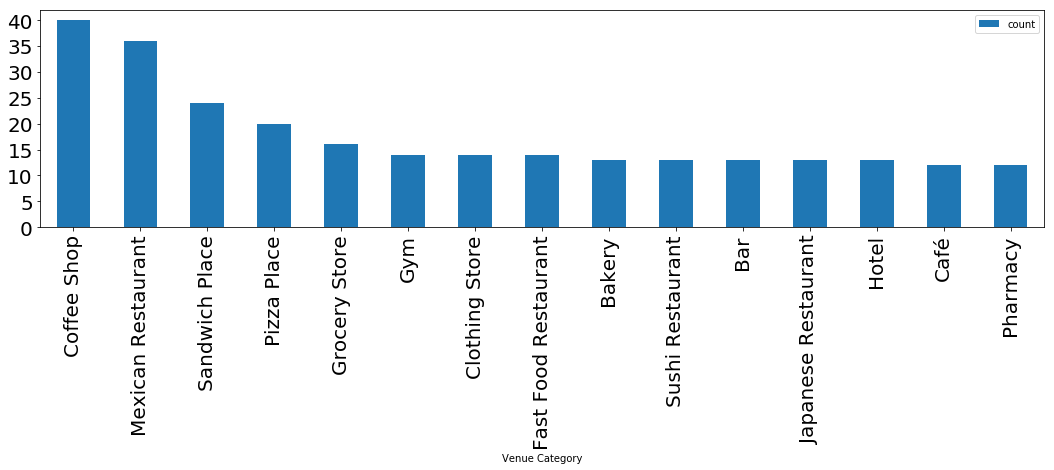

In [33]:
common_ven = SJ_venues.groupby('Venue Category').size().to_frame(name = 'count').reset_index().sort_values(by=['count'], ascending=False).head(15)
common_ven.plot.bar(x='Venue Category', figsize=(18,4), fontsize=20)
common_ven.head()

<h2><a name="item4"></a>Results</h2>

Let us assume that our couple want to focus on locations with more variety of coffee shops and sandwich venues. We can use one hot technique to rule out the venues we are most interested in. We notice from the results that there are 3 different neighborhoods that feature these two kinds of venues as the most frequent venue in the hood. One of them is The Alameda neighborhood. 

In [42]:
#analyzing one neighborhood
# one hot encoding
SJ_onehot = pd.get_dummies(SJ_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
SJ_onehot['Neighborhood'] = SJ_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [SJ_onehot.columns[-1]] + list(SJ_onehot.columns[:-1])
SJ_onehot = SJ_onehot[fixed_columns]

SJ_grouped = SJ_onehot.groupby('Neighborhood').mean().reset_index()

num_top_venues = 5

for hood in SJ_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = SJ_grouped[SJ_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Almaden Valley----
                  venue  freq
0           Coffee Shop  0.13
1        Sandwich Place  0.07
2         Grocery Store  0.07
3  Fast Food Restaurant  0.07
4         Shopping Mall  0.07


----Alum Rock----
               venue  freq
0          Pet Store  0.08
1  Convenience Store  0.08
2        Coffee Shop  0.08
3        Flower Shop  0.08
4     Sandwich Place  0.08


----Alviso----
                venue  freq
0  Mexican Restaurant   0.5
1          Playground   0.5
2         Yoga Studio   0.0
3        Optical Shop   0.0
4    Motorsports Shop   0.0


----Berryessa----
                venue  freq
0  Chinese Restaurant  0.08
1         Pizza Place  0.08
2              Bakery  0.04
3                Café  0.04
4         Coffee Shop  0.04


----Blossom Valley----
              venue  freq
0    Baseball Field   0.6
1       Yoga Studio   0.4
2      Optical Shop   0.0
3  Motorsports Shop   0.0
4     Movie Theater   0.0


----Buena Vista----
                    venue  freq
0      

In [ ]:
The next step is to try 

In [54]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [63]:
num_top_venues = 10
import numpy as np
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = SJ_grouped['Neighborhood']

for ind in np.arange(SJ_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(SJ_grouped.iloc[ind, :], num_top_venues)
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Almaden Valley,Coffee Shop,Bank,Pet Store,Shopping Mall,Sandwich Place,Salon / Barbershop,Donut Shop,Thrift / Vintage Store,Fast Food Restaurant,Bagel Shop
1,Alum Rock,Pizza Place,Diner,Liquor Store,Thrift / Vintage Store,Bakery,BBQ Joint,Coffee Shop,Sandwich Place,Pet Store,Convenience Store
2,Alviso,Mexican Restaurant,Playground,Hockey Arena,History Museum,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
3,Berryessa,Pizza Place,Chinese Restaurant,Convenience Store,Japanese Restaurant,Shipping Store,Bubble Tea Shop,Sandwich Place,Salon / Barbershop,Coffee Shop,Donut Shop
4,Blossom Valley,Baseball Field,Yoga Studio,Ethiopian Restaurant,Flower Shop,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant


In [64]:
# set number of clusters
kclusters = 4
from sklearn.cluster import KMeans
SJ_grouped_clustering = SJ_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(SJ_grouped_clustering)


In [65]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

SJ_merged = SJ_venues

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
SJ_merged = SJ_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
SJ_merged.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,The Alameda,37.332230100,-121.906287000,Whole Foods Market,37.332086,-121.904623,Grocery Store,1,Coffee Shop,Mexican Restaurant,Spa,Bakery,Sushi Restaurant,Hockey Arena,Lounge,Financial or Legal Service,Gift Shop,Brewery
1,The Alameda,37.332230100,-121.906287000,Hannah Cafe,37.331597,-121.905520,Coffee Shop,1,Coffee Shop,Mexican Restaurant,Spa,Bakery,Sushi Restaurant,Hockey Arena,Lounge,Financial or Legal Service,Gift Shop,Brewery
2,The Alameda,37.332230100,-121.906287000,Bluefin Japanese Restaurant & Lounge,37.331733,-121.905002,Sushi Restaurant,1,Coffee Shop,Mexican Restaurant,Spa,Bakery,Sushi Restaurant,Hockey Arena,Lounge,Financial or Legal Service,Gift Shop,Brewery
3,The Alameda,37.332230100,-121.906287000,Crema Coffee Roasting Company,37.331365,-121.908248,Coffee Shop,1,Coffee Shop,Mexican Restaurant,Spa,Bakery,Sushi Restaurant,Hockey Arena,Lounge,Financial or Legal Service,Gift Shop,Brewery
4,The Alameda,37.332230100,-121.906287000,Chipotle Mexican Grill,37.331907,-121.908660,Mexican Restaurant,1,Coffee Shop,Mexican Restaurant,Spa,Bakery,Sushi Restaurant,Hockey Arena,Lounge,Financial or Legal Service,Gift Shop,Brewery


In [66]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(SJ_merged.columns)
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(SJ_merged['Neighborhood Latitude'], SJ_merged['Neighborhood Longitude'], SJ_merged['Neighborhood'], SJ_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [float(lat), float(lon)],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity= 0.4).add_to(map_clusters)
       
map_clusters

Index(['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude',
       'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category',
       'Cluster Labels', '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue'],
      dtype='object')


In [73]:
SJ_merged.loc[SJ_merged['Cluster Labels'] == 0, SJ_merged.columns[[1] + list(range(5, SJ_merged.shape[1]))]].head()

,Neighborhood Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
244,37.3096638,-121.785842,Gym / Fitness Center,0,Pool,Gym / Fitness Center,Cosmetics Shop,History Museum,Donut Shop,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Eye Doctor
245,37.3096638,-121.784313,Cosmetics Shop,0,Pool,Gym / Fitness Center,Cosmetics Shop,History Museum,Donut Shop,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Eye Doctor
246,37.3096638,-121.784762,Pool,0,Pool,Gym / Fitness Center,Cosmetics Shop,History Museum,Donut Shop,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Eye Doctor
402,37.3096638,-121.785842,Gym / Fitness Center,0,Pool,Gym / Fitness Center,Cosmetics Shop,History Museum,Donut Shop,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Eye Doctor
403,37.3096638,-121.784313,Cosmetics Shop,0,Pool,Gym / Fitness Center,Cosmetics Shop,History Museum,Donut Shop,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Eye Doctor


In [74]:
SJ_merged.loc[SJ_merged['Cluster Labels'] == 1, SJ_merged.columns[[1] + list(range(5, SJ_merged.shape[1]))]].head()

,Neighborhood Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,37.332230100,-121.904623,Grocery Store,1,Coffee Shop,Mexican Restaurant,Spa,Bakery,Sushi Restaurant,Hockey Arena,Lounge,Financial or Legal Service,Gift Shop,Brewery
1,37.332230100,-121.905520,Coffee Shop,1,Coffee Shop,Mexican Restaurant,Spa,Bakery,Sushi Restaurant,Hockey Arena,Lounge,Financial or Legal Service,Gift Shop,Brewery
2,37.332230100,-121.905002,Sushi Restaurant,1,Coffee Shop,Mexican Restaurant,Spa,Bakery,Sushi Restaurant,Hockey Arena,Lounge,Financial or Legal Service,Gift Shop,Brewery
3,37.332230100,-121.908248,Coffee Shop,1,Coffee Shop,Mexican Restaurant,Spa,Bakery,Sushi Restaurant,Hockey Arena,Lounge,Financial or Legal Service,Gift Shop,Brewery
4,37.332230100,-121.908660,Mexican Restaurant,1,Coffee Shop,Mexican Restaurant,Spa,Bakery,Sushi Restaurant,Hockey Arena,Lounge,Financial or Legal Service,Gift Shop,Brewery


In [75]:
SJ_merged.loc[SJ_merged['Cluster Labels'] == 2, SJ_merged.columns[[1] + list(range(5, SJ_merged.shape[1]))]]

,Neighborhood Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
191,37.18,-121.699448,Garden Center,2,Garden Center,Women's Store,Electronics Store,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Eye Doctor


<h2><a name="item5"></a>Descussion</h2>

From the last map and the inspection of each cluster that we did in the last three cells, we notice huge gain in knowledge. Most of San Jose's areas/neighborhoods are very similar when it comes to nearby venues. The two unique areas detected were the Coyote Valley and the Rose Garden areas. These areas can be labeled as rural or could be considered suburbs of San Jose. According to the information conveyed by our clients, they are more interested in the areas in the purple color. most matching locations are <b>The Alameda, Naglee Park and San Pedro Square</b>. 

<h2><a name="item6"></a>Conclusion</h2>

The problem at hand was revolving around recommending the best location for living to a new couple moving to San Jose. The preferences were a lively area where lots of coffee shops and sandwich venues can be found. Data detailing the neighborhoods of San Jose was scrapped off of wikipedia along with its latitude and longitude information. In addition, Foursquare API was utilized in aquiring close by venues in regards to each neighborhood. We employed multiple techniques in our approach to clean and prpare the data. Furthermore, we took advantage of clustering algorithms in gaining knowledge about San Jose neighborhoods. Finally, we were able to draw great conclusions and recommend the best fit neighborhoods based on the preferences given and the knowledge gained from the process. 

<h2><a name="item7"></a>References</h2>

[1] New State Residents Statistics, Demographic Data. Retrieved April 4, 2019, from https://www.governing.com/gov-data/residents-moving-to-new-state-demographics-population-statistics.html
</br>[2] Category:Neighborhoods in San Jose, California. (2017, November 15). Retrieved April 4, 2019, from https://en.wikipedia.org/wiki/Category:Neighborhoods_in_San_Jose,_California
